In [33]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [34]:
#defing dataframe
df = pd.read_csv(r"Student_Performance.csv")

In [35]:
#binary field translated into int values
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace("Yes", 1)
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace("No", 0)

C:\Users\Aprameya Kannan\AppData\Local\Temp\ipykernel_27200\4190153199.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Extracurricular Activities'] = df['Extracurricular Activities'].replace("No", 0)


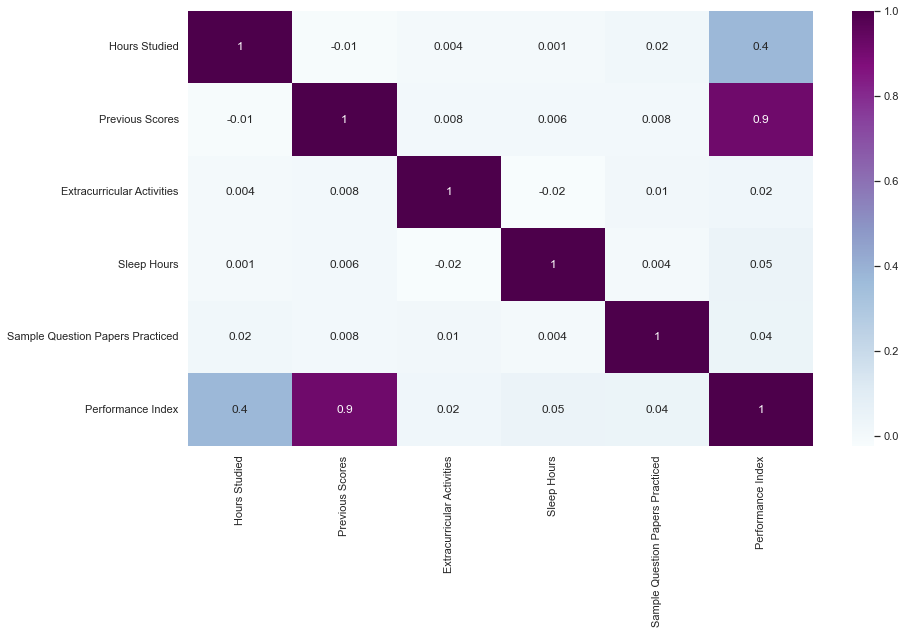

In [36]:
#heatmap of the dataset
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="BuPu", fmt='.1g')

In [37]:
#defining x to be the dataset other than the value that is to be reserved for y and predicted
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

In [38]:
#setting up model fields
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_actual_data = y_test

In [39]:
#preprocessing the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
#setting up the linearregression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [41]:
#examining linear regression coefficients and the intercept
pd.DataFrame(data = np.append(linear_reg.intercept_ , linear_reg.coef_), index = ['Intercept']+[col+" Coef." for col in X.columns], columns=['Value']).sort_values('Value', ascending=False)

,Value
Intercept,55.225857
Previous Scores Coef.,17.710287
Hours Studied Coef.,7.386246
Sleep Hours Coef.,0.804633
Sample Question Papers Practiced Coef.,0.533804
Extracurricular Activities Coef.,0.310893


In [42]:
#evaluating the accuracy of the model with the R2-Score with 1 being a perfectly accurate model
def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

In [43]:
# The R2=Score of 0.988807 tells us that the model is aproximately 98.8 percent accurate
model_evaluation(linear_reg, X_test_scaled, y_test, 'Linear Reg.')

,Linear Reg.
MAE,1.595095
MSE,4.039519
RMSE,2.009856
R2-Score,0.988807
